<a href="https://colab.research.google.com/github/Larasati11/PCVK/blob/main/Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# No.1

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# No.2

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# No.3

<BarContainer object of 256 artists>

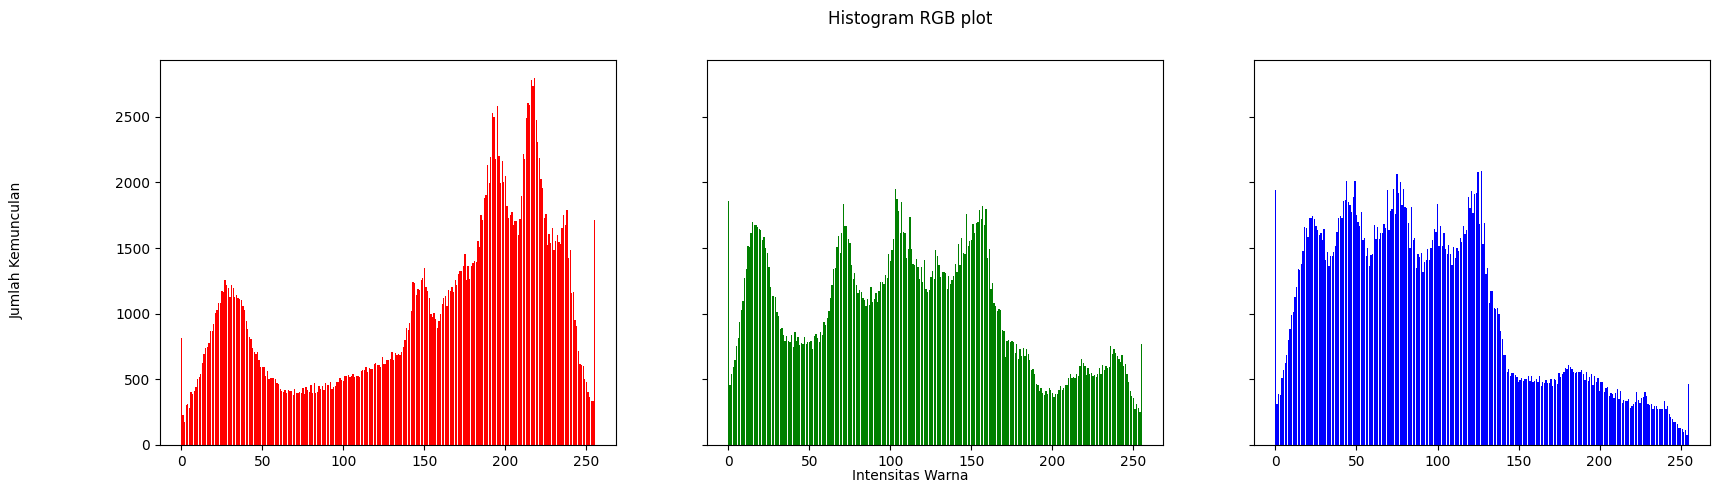

In [ ]:
# Membaca gambar dari file
img = cv.imread('/content/drive/MyDrive/lena.jpg')
# Mengambil dimensi gambar
height, width, depth = np.shape(img)
# Membuat array untuk menyimpan jumlah kemunculan tiap intensitas warna
intensity_values = np.arange(256)

# Inisialisasi daftar untuk menyimpan frekuensi setiap warna
blue_counts = [0] * 256
green_counts = [0] * 256
red_counts = [0] * 256

# Menghitung jumlah kemunculan untuk setiap pixel pada masing-masing channel
for y in range(height):
    for x in range(width):
        blue_counts[img[y][x][0]] += 1
        green_counts[img[y][x][1]] += 1
        red_counts[img[y][x][2]] += 1

# Membuat figure dan axes untuk histogram
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menampilkan histogram untuk setiap warna
axs[0].bar(intensity_values, red_counts, color='red')
axs[1].bar(intensity_values, green_counts, color='green')
axs[2].bar(intensity_values, blue_counts, color='blue')


# No.4

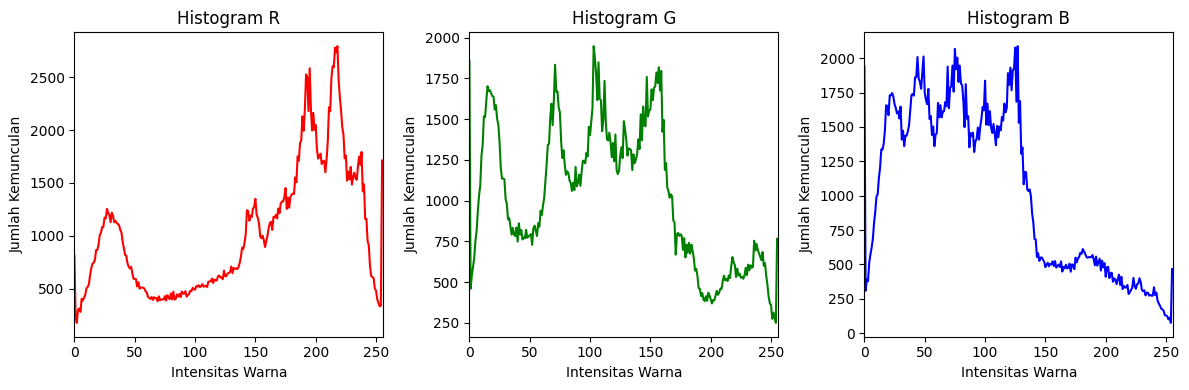

In [ ]:
# Definisikan warna dan channel (dalam urutan yang diinginkan)
colors = ("r", "g", "b")
channel_ids = (2, 1, 0)  # Urutan channel untuk Red, Green, Blue sesuai OpenCV

# Mengatur ukuran figure dengan 3 subplot untuk histogram
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 baris, 3 kolom

# Membuat Histogram Plot
for ax, channel_id, c in zip(axs, channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax.plot(bin_edges[0:-1], histogram, color=c)
    ax.set_xlim([0, 256])
    ax.set_title(f'Histogram {c.upper()}')  # Judul per channel
    ax.set_xlabel("Intensitas Warna")
    ax.set_ylabel("Jumlah Kemunculan")

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan histogram
plt.show()


# No.5

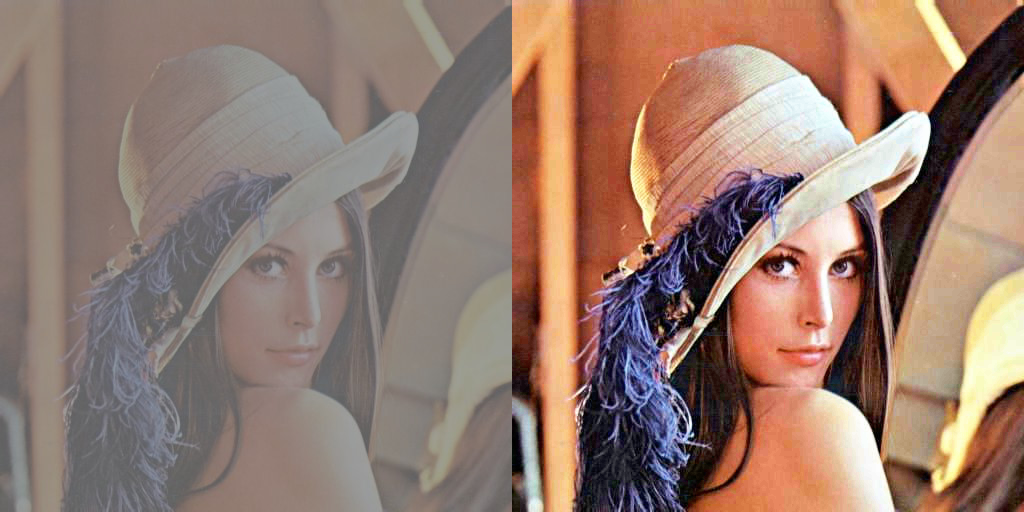

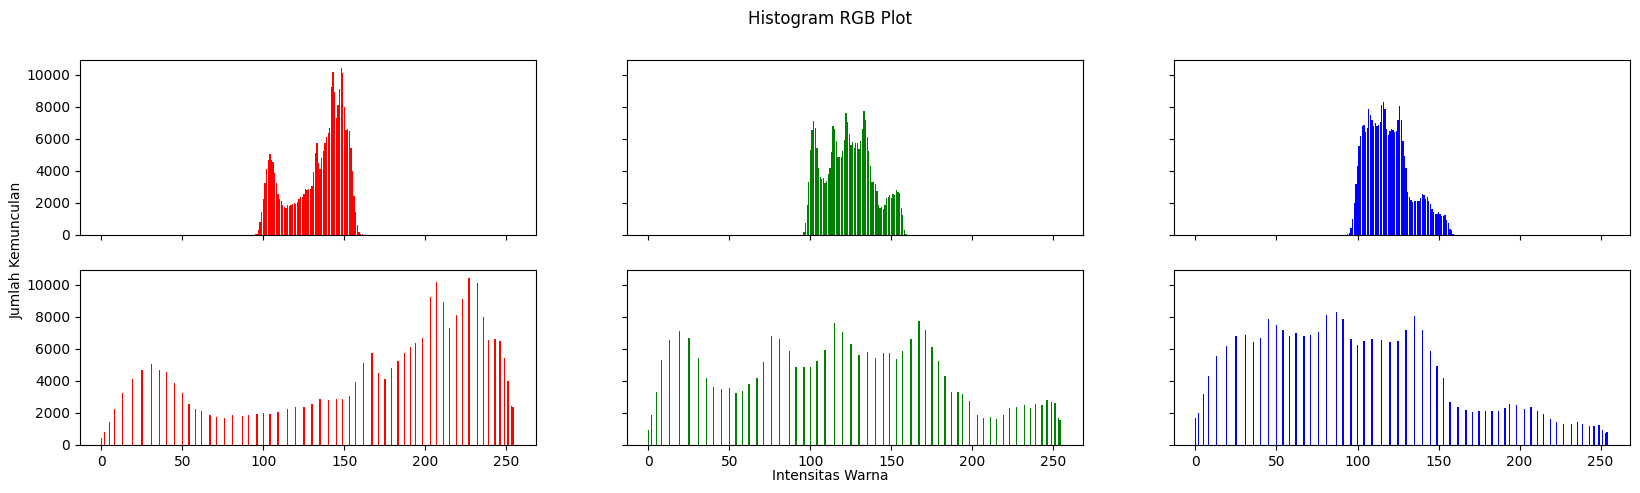

In [ ]:
# Membaca gambar dari file
img = cv.imread('/content/drive/MyDrive/lena_lc.jpg')

def calculate_histogram(image):
    # Mendapatkan dimensi gambar
    height, width, depth = np.shape(image)
    histogram_array = np.zeros((3, 256))  # Inisialisasi array untuk histogram
    # Menghitung frekuensi pixel untuk setiap saluran warna
    for y in range(height):
        for x in range(width):
            histogram_array[0][image[y][x][0]] += 1  # Saluran Biru
            histogram_array[1][image[y][x][1]] += 1  # Saluran Hijau
            histogram_array[2][image[y][x][2]] += 1  # Saluran Merah
    return histogram_array

# Menghitung histogram untuk gambar asli
original_histogram = calculate_histogram(img)

# Mengubah gambar menjadi array Numpy
image_array = np.asarray(img)

# STEP 1: Menghitung histogram kumulatif ternormalisasi
# Meratakan array gambar dan menghitung histogram
histogram_flattened = np.bincount(image_array.flatten(), minlength=256)

# Normalisasi
total_pixels = np.sum(histogram_flattened)
histogram_flattened = histogram_flattened / total_pixels

# Histogram kumulatif ternormalisasi
cumulative_histogram = np.cumsum(histogram_flattened)

# STEP 2: Tabel pencarian untuk pemetaan pixel
mapping_table = np.floor(255 * cumulative_histogram).astype(np.uint8)

# STEP 3: Transformasi
# Meratakan array gambar menjadi list
flattened_image_list = list(image_array.flatten())

# Mengubah nilai pixel untuk melakukan equalization
equalized_image_list = [mapping_table[pixel_value] for pixel_value in flattened_image_list]

# Mengubah kembali menjadi bentuk array gambar
equalized_image_array = np.reshape(np.asarray(equalized_image_list), image_array.shape)
img2 = equalized_image_array

# Menghitung histogram untuk gambar setelah equalization
equalized_histogram = calculate_histogram(img2)

# Menggabungkan gambar asli dan gambar yang telah di-equalize
final_image = cv.hconcat((img, img2))
cv2_imshow(final_image)  # Menggunakan cv2_imshow untuk menampilkan gambar

# Menyiapkan nama untuk histogram
names = np.arange(256)

# Memeriksa apakah gambar berwarna atau grayscale
is_gray_image = np.array_equal(original_histogram[0], original_histogram[1]) and np.array_equal(original_histogram[1], original_histogram[2])

if not is_gray_image:
    # Menyiapkan subplot untuk histogram RGB
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, original_histogram[2], color='red')  # Histogram merah
    axs[0, 1].bar(names, original_histogram[1], color='green')  # Histogram hijau
    axs[0, 2].bar(names, original_histogram[0], color='blue')  # Histogram biru
    axs[1, 0].bar(names, equalized_histogram[2], color='red')  # Histogram merah setelah equalization
    axs[1, 1].bar(names, equalized_histogram[1], color='green')  # Histogram hijau setelah equalization
    axs[1, 2].bar(names, equalized_histogram[0], color='blue')  # Histogram biru setelah equalization
else:
    # Menyiapkan subplot untuk histogram grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, original_histogram[2], color='gray')  # Histogram grayscale
    axs[1].bar(names, equalized_histogram[2], color='gray')  # Histogram grayscale setelah equalization

plt.show()


# No.6

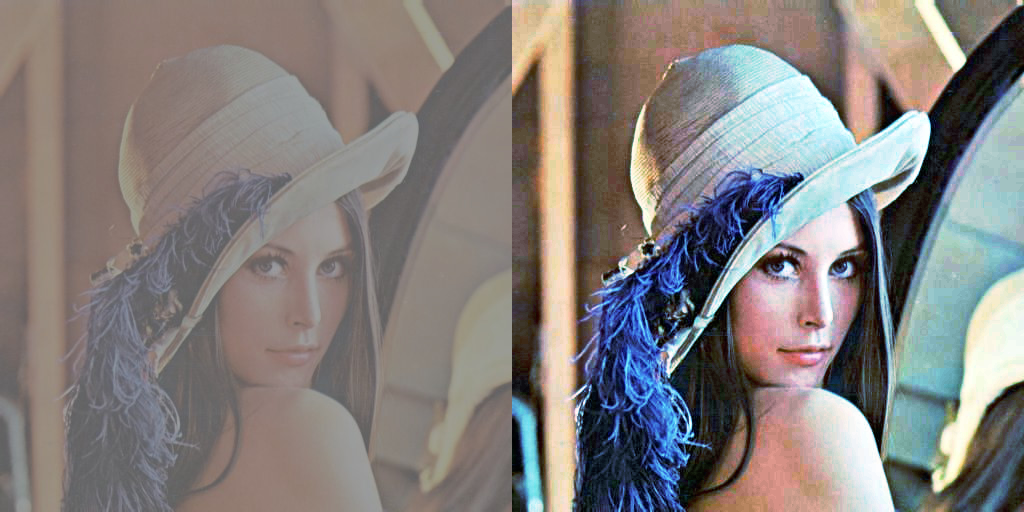

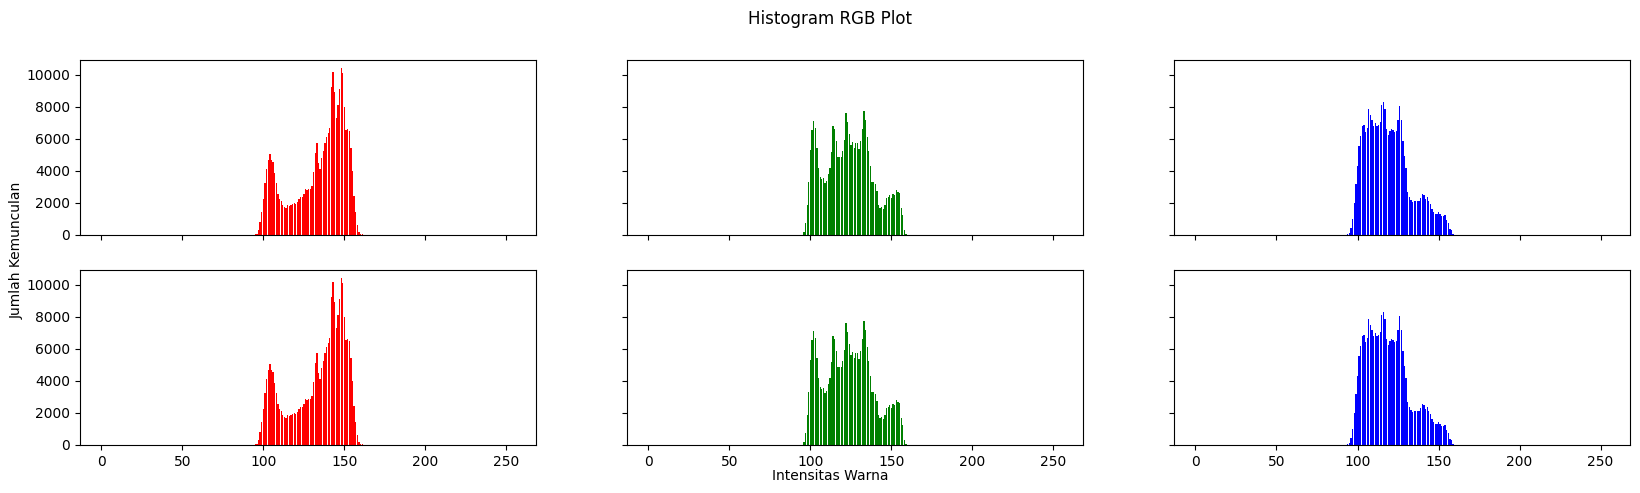

In [ ]:
# Melakukan histogram equalization menggunakan pustaka OpenCV
img = cv.imread('/content/drive/MyDrive/lena_lc.jpg')  # Membaca gambar
channels = cv.split(img)  # Memisahkan saluran warna
eq_channels = []  # Daftar untuk saluran yang telah di-equalize

# Melakukan equalization untuk setiap saluran warna
for ch, color in zip(channels, ['R', 'G', 'B']):
    eq_channels.append(cv.equalizeHist(ch))  # Menyimpan saluran yang telah di-equalize

# Menggabungkan saluran yang telah di-equalize menjadi satu gambar
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)  # Menghitung histogram untuk gambar yang telah di-equalize

# Menggabungkan gambar asli dan gambar yang telah di-equalize
final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)  # Menampilkan gambar gabungan

names = np.arange(256)  # Menyiapkan nama untuk histogram
isgraying = np.array_equal(blue, green, red)  # Memeriksa apakah gambar grayscale

# Memeriksa apakah gambar berwarna atau grayscale
if not isgraying:
    # Menyiapkan subplot untuk histogram RGB
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Menampilkan histogram untuk gambar asli
    axs[0, 0].bar(names, histo_asli[2], color='red')  # Histogram merah
    axs[0, 1].bar(names, histo_asli[1], color='green')  # Histogram hijau
    axs[0, 2].bar(names, histo_asli[0], color='blue')  # Histogram biru

    # Menampilkan histogram untuk gambar setelah equalization
    axs[1, 0].bar(names, histo_asli[2], color='red')  # Histogram merah
    axs[1, 1].bar(names, histo_asli[1], color='green')  # Histogram hijau
    axs[1, 2].bar(names, histo_asli[0], color='blue')  # Histogram biru
else:
    # Menyiapkan subplot untuk histogram grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Menampilkan histogram grayscale
    axs[0, 0].bar(names, histo_asli[2], color='gray')  # Histogram grayscale
    axs[0, 1].bar(names, equal_histo[2], color='gray')  # Histogram grayscale setelah equalization


# No.7

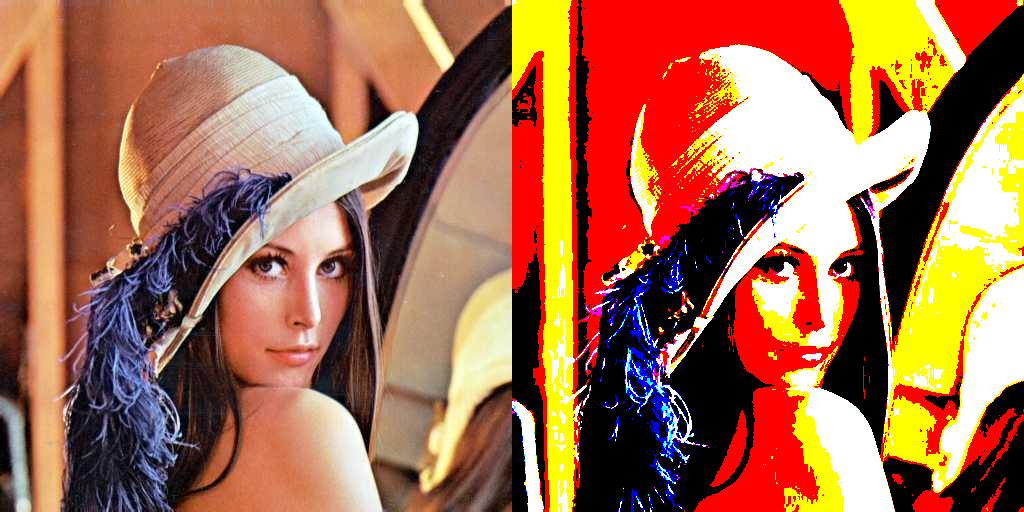

True

In [ ]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = np.zeros(img_1.shape, img_1.dtype)

for y in range(0, img_1.shape[0]):
  for x in range(0, img_1.shape[1]):
    baru = warnaTerdekat(img_1[y, x, 0], img_1[y, x, 1], img_1[y, x, 2])
    img_2[y, x] = warnaPallette[baru]

img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_1, img_2))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/lena_lc.jpg', img_2)

#No.8

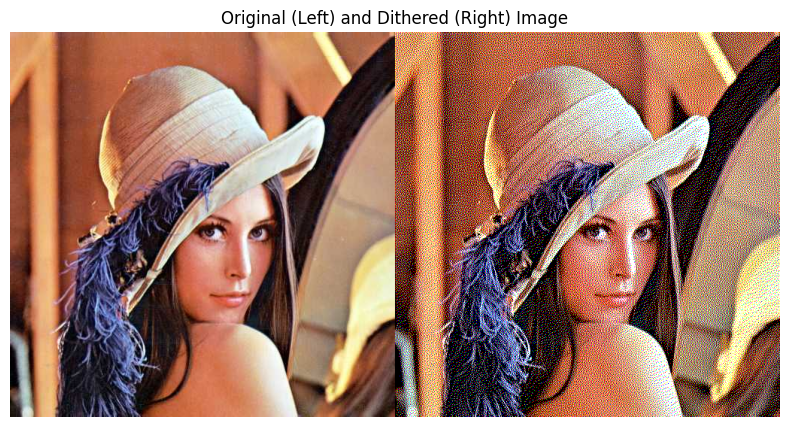

True

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
img = cv.imread('/content/drive/MyDrive/lena.jpg')

# Get image dimensions
height, width, channels = img.shape

# Create a new image for the dithered result
dithered_img = np.zeros((height, width, channels), dtype=np.uint8)

# Create a copy of the original image to apply dithering
img_copy = img.copy()

# Floyd-Steinberg dithering algorithm for each color channel
for c in range(channels):  # Iterate over each color channel (B, G, R)
    for y in range(height):
        for x in range(width):
            old_pixel = img_copy[y, x, c]
            new_pixel = 255 * (old_pixel // 128)  # Thresholding to black or white
            dithered_img[y, x, c] = new_pixel  # Set new pixel value

            # Calculate error
            error = old_pixel - new_pixel

            # Distribute error to neighboring pixels
            if x < width - 1:
                img_copy[y, x + 1, c] = np.clip(img_copy[y, x + 1, c] + (error * 7 / 16), 0, 255)
            if y < height - 1:
                img_copy[y + 1, x, c] = np.clip(img_copy[y + 1, x, c] + (error * 5 / 16), 0, 255)
            if x > 0 and y < height - 1:
                img_copy[y + 1, x - 1, c] = np.clip(img_copy[y + 1, x - 1, c] + (error * 3 / 16), 0, 255)
            if x < width - 1 and y < height - 1:
                img_copy[y + 1, x + 1, c] = np.clip(img_copy[y + 1, x + 1, c] + (error * 1 / 16), 0, 255)

# Display the original and dithered images
final_frame = np.hstack((img, dithered_img))  # Combine original and dithered images

# Plotting the results
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Original (Left) and Dithered (Right) Image')
plt.axis('off')
plt.show()

# Save the dithered image
cv.imwrite('/content/drive/MyDrive/lena_dithered_color.jpg', dithered_img)


# No.9